In [ ]:
import graphviz

Just a quick test from the user manual, http://www.graphviz.org/pdf/dotguide.pdf Figure 20


Initial ideas for curriculum...

red = core-only
purple = core we used to have, reinstate


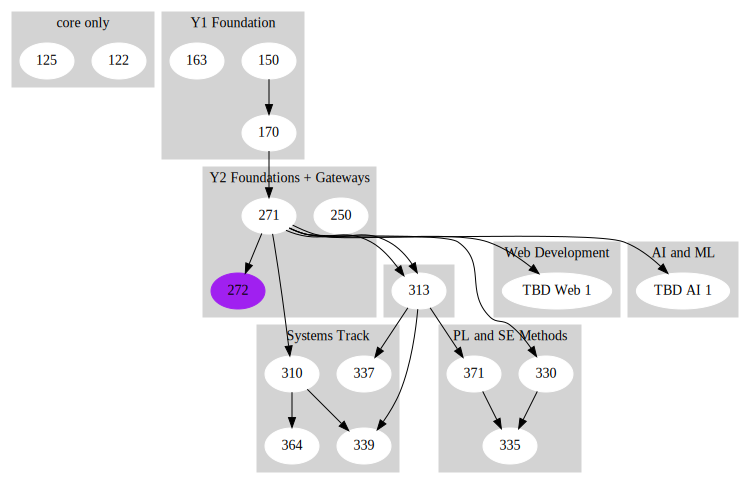

In [10]:
from graphviz import Digraph

g2 = Digraph('G', filename='curriculum.gv')
g2.attr(compound='true')

def set_general_cluster_properties(c):
    c.attr(style='filled')
    c.attr(color='lightgrey')
    c.node_attr.update(style='filled', color='white')
    
with g2.subgraph(name='cluster_core') as c:
    set_general_cluster_properties(c)
    c.node('122')
    c.node('125')
    c.attr(label='core only')
    
with g2.subgraph(name='cluster_foundation_y1') as c:
    set_general_cluster_properties(c)
    c.node('150')
    c.node('163')
    c.edge('150', '170')
    c.attr(label='Y1 Foundation')


with g2.subgraph(name='cluster_year2') as c:
    set_general_cluster_properties(c)
    c.node('250')
    c.node('271')
    c.node('272', color='purple')
    c.edge('271','272')
    c.attr(label='Y2 Foundations + Gateways')



with g2.subgraph(name='cluster_y3') as c:
    set_general_cluster_properties(c)    
    c.node('313')

with g2.subgraph(name='cluster_systems') as c:
    set_general_cluster_properties(c)
    c.edge('271', '310')
    c.edge('310', '339')
    c.edge('310', '364')
    c.edge('313', '339')
    c.edge('313', '337')
    c.attr(label='Systems Track')

with g2.subgraph(name='cluster_plse') as c:
    set_general_cluster_properties(c)
    c.edge('271', '313')
    c.edge('271', '330')
    c.edge('313', '371')
    c.edge('330', '335')
    c.edge('371', '335')
    c.attr(label='PL and SE Methods')


with g2.subgraph(name='cluster_web') as c:
    set_general_cluster_properties(c)
    c.edge('271', 'TBD Web 1')
    c.attr(label='Web Development')

with g2.subgraph(name='cluster_ai') as c:
    set_general_cluster_properties(c)
    c.edge('271', 'TBD AI 1')
    c.attr(label='AI and ML')

    
g2.edge('170', '271')
g2.edge('271', '313')


g2.save()


g2